<a href="https://colab.research.google.com/github/Ibnuard/phyton_bri_hackanton/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [3]:
files.upload()

Saving train.csv to train.csv


{'train.csv': b'job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3\nJG05,8.0,PG06,8.0,0.5,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached\nJG04,5.17,PG04,2.0,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached\nJG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_

In [5]:
df = pd.read_csv('train.csv')

In [71]:
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [72]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,2,8.00,5,8.00,0.50,0,1,0,1,1,3,1,2,4,2.320000,4,30.0,28,8,6,0,8,0,0,68.85,72.53,0.0,6,7,2
1,1,5.17,3,2.00,1.25,0,1,1,16,1,3,2,1,4,3.250000,18,15.0,14,6,6,9,3,0,0,94.81,101.13,3.0,6,6,2
2,1,1.83,2,1.83,1.50,0,1,1,17,1,1,0,1,5,3.230000,24,15.0,13,8,8,0,6,0,0,72.82,71.30,0.0,5,7,1
3,1,7.92,3,4.00,0.17,0,1,1,21,1,0,0,0,3,0.000000,23,8.0,7,4,4,0,3,0,0,86.89,90.09,2.0,6,6,1
4,1,1.83,2,1.83,2.08,0,1,1,21,1,1,0,1,6,2.994603,30,7.0,6,3,5,11,2,1,1,95.17,100.72,2.0,7,8,1


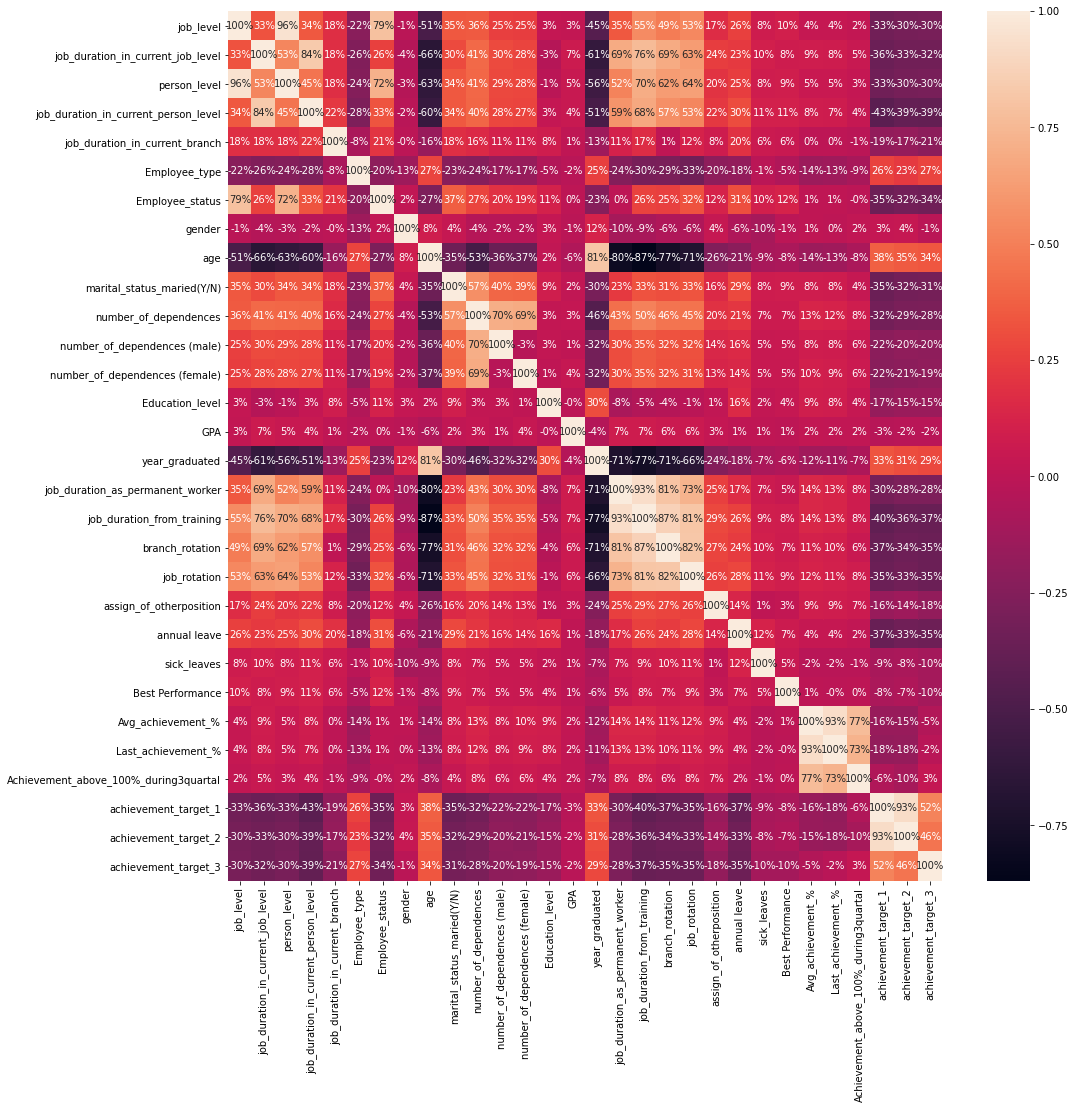

In [73]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt= '.0%')

In [74]:
x = df.drop(['Best Performance'], axis = 1)
y = df['Best Performance']

print(x.shape)
print(y.shape)

(21814, 29)
(21814,)


In [87]:
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
from collections import Counter
print('original data y : {}'.format(Counter(y)))
print('undersampling data y : {}'.format(Counter(y_smote)))

original data y : Counter({0: 19186, 1: 2628})
undersampling data y : Counter({0: 19186, 1: 19186})


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 7)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28779, 29)
(28779,)
(9593, 29)
(9593,)


In [117]:
#use random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=400, max_depth=8)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

score = cross_val_score(rfc, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)


In [115]:
print(f'Model F1 score : {np.mean(score)}')

Model F1 score : 0.9056996547724923


In [96]:
test_pred = model.predict(x_test)
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, test_pred)))

#confusion matric
print("Confusion Matric : \n{}".format(confusion_matrix(y_test, test_pred)))

Accuracy Score: 0.91
Confusion Matric : 
[[4648  151]
 [ 757 4037]]


In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.590


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


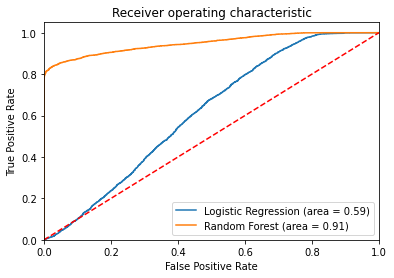

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, model.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [119]:
predicted = rfc.predict(td)

In [123]:
np.unique(predicted)

array([0, 1])

In [120]:
my_solution = pd.DataFrame(predicted, columns = ["Best Performance"])

In [125]:
my_solution.to_csv("submissionv2.csv", index_label = ["index"])

In [126]:
files.download('submissionv2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>